In [2]:
import numpy as np
import pandas as pd
import gzip
import re
import string
from nltk import PorterStemmer, WordNetLemmatizer
import nltk

# Computing the inverted index for the reviews

In [ ]:
# nltk.download('stopwords')
# nltk.download('wordnet')

In [4]:
def clean_string(text, stem="None"):
    if pd.isna(text):
        text = ""
    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    # Note: that this line can be augmented and used over
    # to replace any characters with nothing or a space
    text = re.sub(r'\n', '', text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [5]:
df_ratings = pd.read_csv('../BeerAdvocate/ratings_processed.csv')

In [6]:
df_ratings['text_clean'] = df_ratings['text'].apply(lambda x: clean_string(x, stem='None')) # 38mn

In [7]:
# pickle the dataframe
# import pickle
# with open('../BeerAdvocate/ratings_processed_cleaned.pkl', 'wb') as f:
#     pickle.dump(df_ratings, f)

In [1]:
import numpy as np
import pandas as pd
import gzip
import re
import string
from nltk import PorterStemmer, WordNetLemmatizer
import nltk

# import pickle
# with open('../BeerAdvocate/ratings_processed_cleaned.pkl', 'rb') as f:
#     df_ratings = pickle.load(f)

In [2]:
# save as csv
# df_ratings.to_csv('../BeerAdvocate/ratings_processed_cleaned.csv', index=False)

In [2]:
# load csv in chunks
df_ratings = pd.read_csv('../BeerAdvocate/ratings_processed_cleaned.csv', chunksize=10000)

In [ ]:
from collections import defaultdict, Counter
from tqdm import tqdm

# Open a file to write the inverted index data
with open('inverted_index.txt', 'w') as f:
    for chunk in tqdm(df_ratings):
        # Replace NaN with empty strings
        chunk['text_clean'] = chunk['text_clean'].replace(np.nan, '', regex=True)
        
        # Process each row in the chunk
        for idx, text in chunk['text_clean'].items():
            word_counts = Counter(text.split())  # Count occurrences of each word in the row
            for word, count in word_counts.items():
                # Write each word and its occurrence in this row to the file
                f.write(f"{word},{idx},{count}\n")

In [1]:
import pandas as pd
from itertools import groupby
import csv

# First, sort the file by `word` column (this can be done in Unix-based systems)
# Run this in the command line, or adjust to your environment:
# `sort -t, -k1,1 inverted_index.txt > inverted_index_sorted.txt`

# Initialize an output file to store the merged inverted index
output_file = 'merged_inverted_index.txt'

# Function to process sorted lines and accumulate counts for each word
def process_sorted_file(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(['word', 'postings'])  # Header for CSV file

        # Group lines by word, assuming the file is sorted by word
        for word, lines in groupby(infile, key=lambda line: line.split(',')[0]):
            postings = []  # List to accumulate (index, count) pairs for the word

            for line in lines:
                _, idx, count = line.strip().split(',')
                postings.append((int(idx), int(count)))  # Add each (index, count) tuple
            
            # Write the word and its postings list to the output file
            writer.writerow([word, postings])

# Run the processing function on the sorted file
process_sorted_file('inverted_index_sorted.txt', output_file)

In [4]:
# merged_inverted_index.txt is in the format: word,"[(id1, count1), (id2, count2), ...]"

# get the 1000 most common words in the dataset and their counts
from collections import Counter
import pandas as pd


# Load the merged inverted index
inverted_index = pd.read_csv('merged_inverted_index.txt')



In [6]:
# Get the 1000 most common words
word_counts = Counter()
for idx, row in inverted_index.iterrows():
    word_counts[row['word']] = sum([count for _, count in eval(row['postings'])])



[('beer', 2220596), ('head', 1737581), ('nice', 1230717), ('light', 1193011), ('good', 1173115), ('malt', 1119044), ('taste', 1095313), ('like', 1062692), ('hops', 1034123), ('sweet', 1001603), ('one', 911828), ('bit', 908981), ('dark', 872351), ('carbonation', 836347), ('flavor', 834483), ('little', 790449), ('aroma', 728218), ('well', 720097), ('color', 706190), ('hop', 679369), ('bottle', 657165), ('body', 655391), ('finish', 645602), ('medium', 621703), ('really', 611427), ('white', 599014), ('pours', 588770), ('chocolate', 584013), ('caramel', 578749), ('brown', 567711), ('much', 550873), ('notes', 539000), ('glass', 536919), ('citrus', 531264), ('bitterness', 516161), ('lacing', 509567), ('poured', 508407), ('smell', 506962), ('great', 506009), ('alcohol', 494009), ('malts', 485108), ('bitter', 480969), ('would', 478336), ('nose', 475827), ('smooth', 466646), ('flavors', 463877), ('coffee', 460166), ('mouthfeel', 454217), ('sweetness', 438718), ('pretty', 430821), ('slightly', 42

# Keeping only the most important words in the reviews

In [9]:
most_common_words = word_counts.most_common(1000)

print(most_common_words)

[('beer', 2220596), ('head', 1737581), ('nice', 1230717), ('light', 1193011), ('good', 1173115), ('malt', 1119044), ('taste', 1095313), ('like', 1062692), ('hops', 1034123), ('sweet', 1001603), ('one', 911828), ('bit', 908981), ('dark', 872351), ('carbonation', 836347), ('flavor', 834483), ('little', 790449), ('aroma', 728218), ('well', 720097), ('color', 706190), ('hop', 679369), ('bottle', 657165), ('body', 655391), ('finish', 645602), ('medium', 621703), ('really', 611427), ('white', 599014), ('pours', 588770), ('chocolate', 584013), ('caramel', 578749), ('brown', 567711), ('much', 550873), ('notes', 539000), ('glass', 536919), ('citrus', 531264), ('bitterness', 516161), ('lacing', 509567), ('poured', 508407), ('smell', 506962), ('great', 506009), ('alcohol', 494009), ('malts', 485108), ('bitter', 480969), ('would', 478336), ('nose', 475827), ('smooth', 466646), ('flavors', 463877), ('coffee', 460166), ('mouthfeel', 454217), ('sweetness', 438718), ('pretty', 430821), ('slightly', 42

In [10]:
# save word counts to pickle
# import pickle
# with open('word_counts.pkl', 'wb') as f:
#     pickle.dump(word_counts, f)

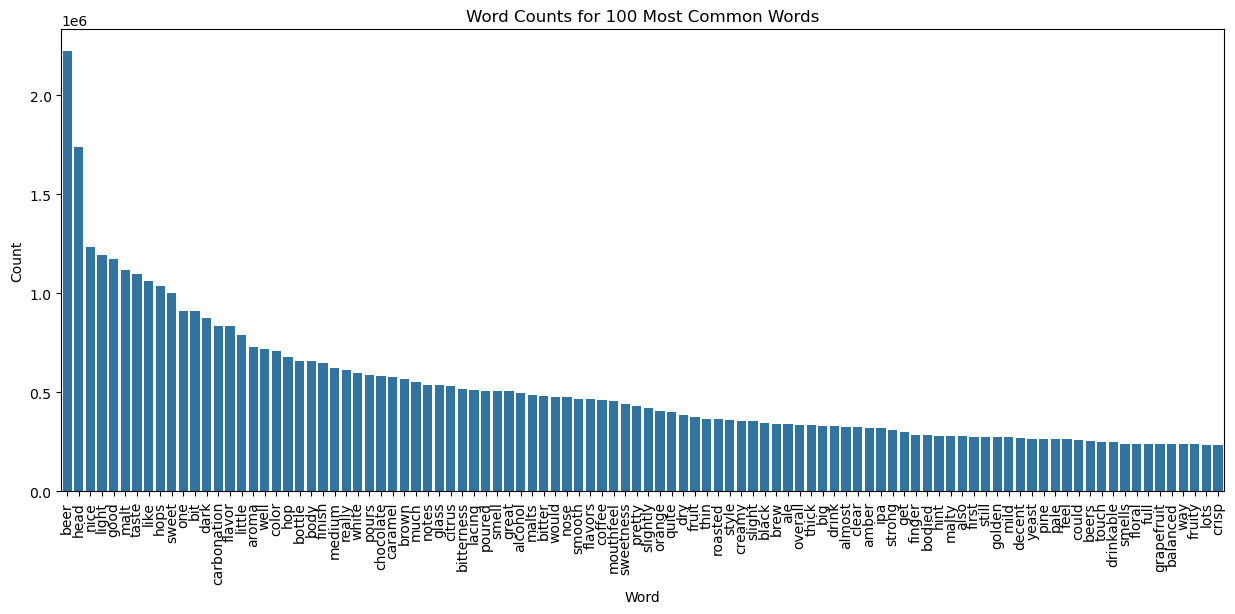

In [1]:
# histogram of word counts for the 100 most common words
import matplotlib.pyplot as plt
import seaborn as sns

# Load the word counts
import pickle
with open('word_counts.pkl', 'rb') as f:
    word_counts = pickle.load(f)

# Get the 100 most common words
most_common_words = word_counts.most_common(100)

# sort the words by count and plot a histogram with a bar for each word
plt.figure(figsize=(15, 6))
sns.barplot(x=[word for word, _ in most_common_words], y=[count for _, count in most_common_words])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for 100 Most Common Words')
plt.show()


In [ ]:
# now, for each beer, I need to get for each word in the 1000 most common words, the count of that word in the reviews of that beer
# and store it in a dataframe
# columns: beer_id, word1, word2, ..., word1000

In [3]:
# load ratings
import pandas as pd
import numpy as np

df_ratings_iter = pd.read_csv('../BeerAdvocate/ratings_processed_cleaned.csv', chunksize=10000)

In [4]:
# first, let's check that the inverted index is correct
inverted_index = pd.read_csv('merged_inverted_index.txt', chunksize=10000)

In [17]:
# print row 1000008 in df_ratings
df_ratings_iter = pd.read_csv('../BeerAdvocate/ratings_processed_cleaned.csv', chunksize=10000)
for chunk in df_ratings_iter:
    if 683384 in chunk.index:
        print(chunk.loc[683384]["text_clean"])
        break

# there are some misses in the inverted index, but they are not many so I will ignore them

aromafairly delicate would called faint scent slight hoppiness nose maybe bit pearmouthfeelpretty highly carbonated really much regarding body little heaviness waterappearancepale straw poured around  head kind hanging around little bit lacingtasterather nice light flavor getting bit pear hints hops somewhat bitburger like overall actuallydrinkabilityrather session beer definitely fits bill real aftertaste offend even non real beer drinkersoverallgreat flavor light palette favorite style good meant sessionable beer originally competitor light lagers


In [14]:
inverted_index = pd.read_csv('merged_inverted_index.txt', chunksize=10000)
for chunk in inverted_index:
    print(chunk)
    break

# nice the inverted index is correct

                                   word  \
0                                        
1                                        
2                                        
3                                        
4                                        
...                                 ...   
9995              actuallydrinkabilitya   
9996          actuallydrinkabilityampgt   
9997  actuallydrinkabilitydisappointing   
9998       actuallydrinkabilityhonestly   
9999         actuallydrinkabilityrather   

                                        postings  
0                   [(1566910, 1), (2165262, 1)]  
1     [(3394663, 1), (4286027, 1), (5774091, 1)]  
2                                 [(6334934, 1)]  
3                                 [(6524900, 1)]  
4                                 [(3464223, 1)]  
...                                          ...  
9995                              [(3964269, 1)]  
9996                              [(6239861, 1)]  
9997                    

In [1]:
import pandas as pd
import ast
from tqdm import tqdm
import numpy as np

def process_word_counts(df_ratings, inverted_index_iter, most_common_words):
    # Create a dictionary to store iloc to beer_id mappings
    iloc_to_beer_id = df_ratings['beer_id'].to_dict()    
    
    # Create a dictionary to store results
    # Initialize with empty dictionary for faster updates
    results = {}
    
    # Create list of word columns for easier reference
    word_columns = [word for word, _ in most_common_words]
    
    print("Processing word counts...")
    # Process each chunk of the inverted index
    for chunk in tqdm(inverted_index_iter):
        for _, row in chunk.iterrows():
            # Skip if word not in most common words
            if row['word'] not in word_columns:
                continue
                
            # Parse the postings string into a list of tuples
            try:
                postings = ast.literal_eval(row['postings'])
            except:
                print(f"Error parsing postings for word: {row['word']}")
                continue
            
            # Process each posting
            for iloc, count in postings:
                # Get corresponding beer_id
                beer_id = iloc_to_beer_id.get(iloc)
                if beer_id is None:
                    continue
                
                # If this beer_id isn't in results yet, initialize it
                if beer_id not in results:
                    results[beer_id] = {word: 0 for word, _ in most_common_words}
                
                # Add the count for this word
                results[beer_id][row['word']] += count
    
    # Convert results dictionary to dataframe
    print("Converting to dataframe...")
    df_results = pd.DataFrame.from_dict(results, orient='index')
    df_results.index.name = 'beer_id'
    df_results.reset_index(inplace=True)
    
    return df_results

# Usage:
# Reset iterators first
df_ratings = pd.read_csv('../BeerAdvocate/ratings_processed_cleaned.csv', usecols=['beer_id'])
inverted_index_iter = pd.read_csv('merged_inverted_index.txt', chunksize=10000)

# get the 1000 most common words
import pickle
with open('word_counts.pkl', 'rb') as f:
    word_counts = pickle.load(f)

most_common_words = word_counts.most_common(1000)

# Process the data
result_df = process_word_counts(df_ratings, inverted_index_iter, most_common_words)

# Save the results
result_df.to_csv('beer_word_counts2.csv', index=False)

Processing word counts...


130it [44:07, 20.36s/it]


Converting to dataframe...


In [2]:
list(result_df.columns)

['beer_id',
 'beer',
 'head',
 'nice',
 'light',
 'good',
 'malt',
 'taste',
 'like',
 'hops',
 'sweet',
 'one',
 'bit',
 'dark',
 'carbonation',
 'flavor',
 'little',
 'aroma',
 'well',
 'color',
 'hop',
 'bottle',
 'body',
 'finish',
 'medium',
 'really',
 'white',
 'pours',
 'chocolate',
 'caramel',
 'brown',
 'much',
 'notes',
 'glass',
 'citrus',
 'bitterness',
 'lacing',
 'poured',
 'smell',
 'great',
 'alcohol',
 'malts',
 'bitter',
 'would',
 'nose',
 'smooth',
 'flavors',
 'coffee',
 'mouthfeel',
 'sweetness',
 'pretty',
 'slightly',
 'orange',
 'quite',
 'dry',
 'fruit',
 'thin',
 'roasted',
 'style',
 'creamy',
 'slight',
 'black',
 'brew',
 'ale',
 'overall',
 'thick',
 'big',
 'drink',
 'almost',
 'clear',
 'amber',
 'ipa',
 'strong',
 'get',
 'finger',
 'bodied',
 'hint',
 'malty',
 'also',
 'first',
 'still',
 'golden',
 'mild',
 'decent',
 'yeast',
 'pine',
 'pale',
 'feel',
 'could',
 'beers',
 'touch',
 'drinkable',
 'smells',
 'floral',
 'full',
 'grapefruit',
 'bala

In [5]:
result_df

,beer_id,beer,head,nice,light,good,malt,taste,like,hops,...,ample,rounded,play,hand,shared,powerful,crazy,helps,caramelized,jet
0,28248,520,523,347,179,370,288,274,328,146,...,3,11,7,3,3,14,7,5,6,40
1,98394,5,5,0,2,0,3,3,7,3,...,0,0,0,0,0,0,0,0,0,0
2,54636,92,53,27,41,20,27,32,73,6,...,0,1,2,2,7,2,3,0,2,0
3,113063,3,4,2,0,1,4,3,3,4,...,0,0,1,0,0,0,0,0,0,0
4,28247,146,130,100,118,92,55,73,69,64,...,1,5,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137828,187300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137829,239535,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137830,196740,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137831,131307,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# for each beer_id, get the total number of ratings with review==True and put it in result_df
df_ratings = pd.read_csv('../BeerAdvocate/ratings_processed_cleaned.csv')

# Create a dictionary to store the total number of ratings for each beer
# also store the average and std "abv", "appearance", "aroma", "palate", "taste", "overall" and "rating"

# first, create an index from beer_id to iloc in df_ratings
beer_id_to_iloc = {} # beer_id_to_iloc[beer_id] = [iloc1, iloc2, ...]

for i, row in df_ratings.iterrows():
    if row["beer_id"] not in beer_id_to_iloc:
        beer_id_to_iloc[row["beer_id"]] = []
    beer_id_to_iloc[row["beer_id"]].append(i)


In [10]:
# save the dictionary to pickle
# import pickle
# with open('beer_id_to_iloc.pkl', 'wb') as f:
#     pickle.dump(beer_id_to_iloc, f)

In [6]:
# load beer_id_to_iloc
import pickle
with open('beer_id_to_iloc.pkl', 'rb') as f:
    beer_id_to_iloc = pickle.load(f)

In [14]:
type(df_ratings.iloc[0]["review"])


numpy.bool_

In [15]:
# adding ratings to the dictionary for future analysis

beer_id_to_numbers = {}  # beer_id_to_numbers[beer_id] = [total_ratings, average_abv, std_abv, average_appearance, std_appearance, average_aroma, std_aroma, average_palate, std_palate, average_taste, std_taste, average_overall, std_overall, average_rating, std_rating]

for beer_id, ilocs in beer_id_to_iloc.items():
    total_ratings = 0
    abv = []
    appearance = []
    aroma = []
    palate = []
    taste = []
    overall = []
    rating = []
    for iloc in ilocs:
        row = df_ratings.loc[iloc]
        if row["review"]:
            total_ratings += 1
        if not np.isnan(row["abv"]):
            abv.append(row["abv"])
        if not np.isnan(row["appearance"]):
            appearance.append(row["appearance"])
        if not np.isnan(row["aroma"]):
            aroma.append(row["aroma"])
        if not np.isnan(row["palate"]):
            palate.append(row["palate"])
        if not np.isnan(row["taste"]):
            taste.append(row["taste"])
        if not np.isnan(row["overall"]):
            overall.append(row["overall"])
        if not np.isnan(row["rating"]):
            rating.append(row["rating"])
    
    average_abv = np.mean(abv) if abv else np.nan
    std_abv = np.std(abv) if abv else np.nan
    average_appearance = np.mean(appearance) if appearance else np.nan
    std_appearance = np.std(appearance) if appearance else np.nan
    average_aroma = np.mean(aroma) if aroma else np.nan
    std_aroma = np.std(aroma) if aroma else np.nan
    average_palate = np.mean(palate) if palate else np.nan
    std_palate = np.std(palate) if palate else np.nan
    average_taste = np.mean(taste) if taste else np.nan
    std_taste = np.std(taste) if taste else np.nan
    average_overall = np.mean(overall) if overall else np.nan
    std_overall = np.std(overall) if overall else np.nan
    average_rating = np.mean(rating) if rating else np.nan
    std_rating = np.std(rating) if rating else np.nan
    
    beer_id_to_numbers[beer_id] = [total_ratings, average_abv, std_abv, average_appearance, std_appearance, average_aroma, std_aroma, average_palate, std_palate, average_taste, std_taste, average_overall, std_overall, average_rating, std_rating]

In [16]:
# save the dictionary to pickle
# import pickle
# with open('beer_id_to_numbers.pkl', 'wb') as f:
#     pickle.dump(beer_id_to_numbers, f)

In [7]:
# load beer_id_to_numbers
import pickle
with open('beer_id_to_numbers.pkl', 'rb') as f:
    beer_id_to_numbers = pickle.load(f)

In [8]:
print(beer_id_to_numbers[28248]) 

[520, 9.0, 0.0, 4.303451178451178, 0.40771273202940406, 4.084175084175084, 0.41166952068541157, 4.088804713804714, 0.4878628777151707, 4.148989898989899, 0.44060410384941495, 4.098905723905724, 0.4571298040805092, 4.1268848758465015, 0.3922692593716839]


In [9]:
# now let's add beer_id_to_numbers to result_df

# # Load the results dataframe
# result_df = pd.read_csv('beer_word_counts.csv')

# # Load the beer_id to numbers dictionary
# import pickle
# with open('beer_id_to_numbers.pkl', 'rb') as f:
#     beer_id_to_numbers = pickle.load(f)

# Add the total ratings to the results dataframe
result_df['total_ratings'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][0])

# Add the average and std "abv", "appearance", "aroma", "palate", "taste", "overall" and "rating" to the results dataframe
result_df['abv_score'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][1])
# result_df['std_abv'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][2])
result_df['average_appearance'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][3])
result_df['std_appearance'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][4])
result_df['average_aroma'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][5])
result_df['std_aroma'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][6])
result_df['average_palate'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][7])
result_df['std_palate'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][8])
result_df['average_taste'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][9])
result_df['std_taste'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][10])
result_df['average_overall'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][11])
result_df['std_overall'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][12])
result_df['average_rating'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][13])
result_df['std_rating'] = result_df['beer_id'].apply(lambda x: beer_id_to_numbers[x][14])


In [10]:
# Save the updated results
# result_df.to_csv('beer_word_counts2.csv', index=False)

In [11]:
result_df[["beer_id","aroma"]]

,beer_id,aroma
0,28248,206
1,98394,0
2,54636,16
3,113063,3
4,28247,58
...,...,...
137828,187300,0
137829,239535,0
137830,196740,0
137831,131307,0


In [1]:
import pandas as pd
import numpy as np

# load 'beer_word_counts.csv'
result_df = pd.read_csv('beer_word_counts2.csv')

In [13]:
print(result_df["abv_score"])

0          9.0
1          7.0
2         17.0
3         12.5
4          6.5
          ... 
137828     NaN
137829     6.5
137830     7.8
137831     9.6
137832     4.0
Name: abv_score, Length: 137833, dtype: float64


In [59]:
import pickle
with open('word_counts.pkl', 'rb') as f:
    word_counts = pickle.load(f)

most_common_words = word_counts.most_common(200)
most_common_words = np.array([word for word, _ in most_common_words])

In [58]:
result_df[most_common_words]

,beer,head,nice,light,good,malt,taste,like,hops,sweet,...,drinkable,smells,floral,full,grapefruit,balanced,way,fruity,lots,crisp
0,520,523,347,179,370,288,274,328,146,216,...,70,69,15,127,5,71,68,42,64,7
1,5,5,0,2,0,3,3,7,3,4,...,1,2,0,0,0,0,0,4,1,0
2,92,53,27,41,20,27,32,73,6,90,...,7,12,3,8,0,3,9,17,8,1
3,3,4,2,0,1,4,3,3,4,10,...,1,1,3,0,2,2,0,9,3,0
4,146,130,100,118,92,55,73,69,64,41,...,21,20,30,15,11,11,13,30,12,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
137829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


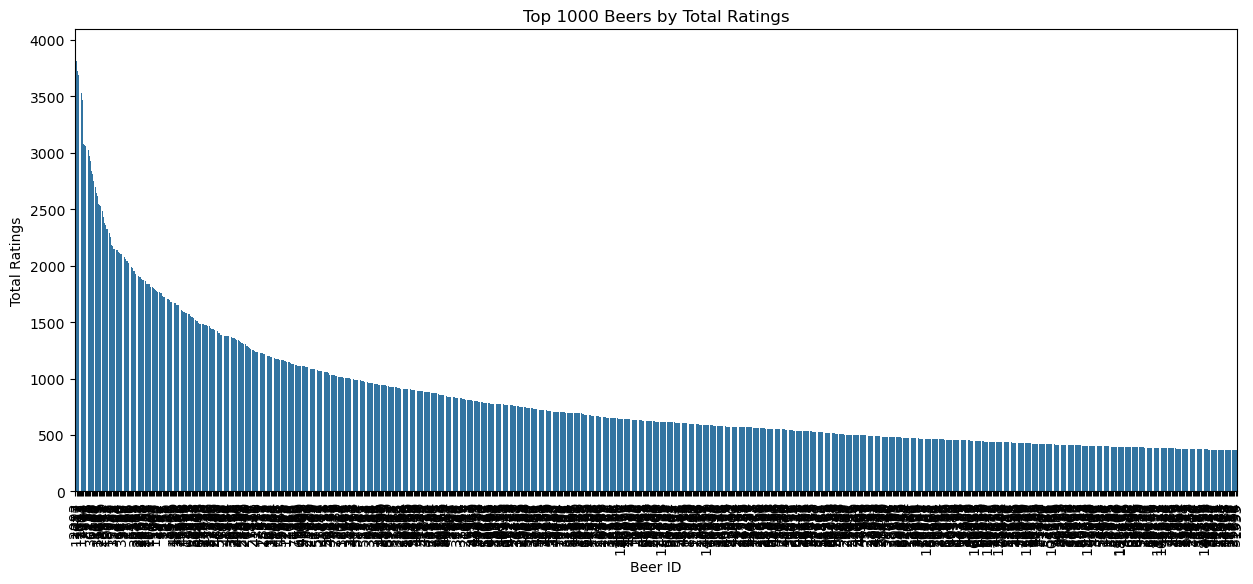

In [45]:
# Sort the 'highest_beers' DataFrame to ensure it's in descending order of total_ratings
beer_total_ratings = result_df[["beer_id","total_ratings"]].sort_values(by="total_ratings", ascending=False)
highest_beers = beer_total_ratings.head(1000).sort_values(by="total_ratings", ascending=False)

# Plot in descending order of total_ratings
plt.figure(figsize=(15, 6))
sns.barplot(x=highest_beers['beer_id'], y=highest_beers['total_ratings'], order=highest_beers['beer_id'])
plt.xticks(rotation=90)
plt.xlabel('Beer ID')
plt.ylabel('Total Ratings')
plt.title('Top 1000 Beers by Total Ratings')
plt.show()

In [46]:
# get beers with more than 500 ratings
most_rated_beers = beer_total_ratings[beer_total_ratings["total_ratings"]>500]
print(most_rated_beers)

      beer_id  total_ratings
4960     2093           3899
6300    11757           3811
469       412           3722
565      7971           3690
6280     1093           3561
...       ...            ...
4876     2270            503
2394     1053            502
3372    26541            502
6118     5096            501
5447      431            501

[668 rows x 2 columns]


In [60]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def calculate_entropy_metrics(result_df, most_common_words):
    """
    Calculate entropy metrics for word distributions in beer descriptions.
    Optimized version with proper zero handling and vectorized operations.
    """
    # Pre-calculate total word counts once
    total_word_counts = result_df[most_common_words].sum(axis=1)
    
    # Calculate base probabilities matrix once
    # Use float32 to reduce memory usage while maintaining sufficient precision
    probabilities = result_df[most_common_words].astype(np.float32).div(total_word_counts, axis=0)
    
    # Calculate total entropy using vectorized operations
    # Replace zeros with small value to avoid log(0)
    EPS = 1e-10
    prob_no_zeros = np.maximum(probabilities, EPS)
    total_entropy = -np.sum(prob_no_zeros * np.log(prob_no_zeros), axis=1).mean()
    
    print("Total entropy:", total_entropy)
    
    # Initialize arrays for results
    n_words = len(most_common_words)
    entropy_values = np.zeros(n_words, dtype=np.float32)
    
    # Vectorized calculation for each word removal
    for i, word in enumerate(tqdm(most_common_words)):
        # Calculate reduced word counts and probabilities
        reduced_counts = total_word_counts - result_df[word]
        mask = most_common_words != word
        
        # Calculate reduced probabilities only for necessary columns
        reduced_probs = result_df[most_common_words].loc[:, mask].astype(np.float32).div(
            reduced_counts, axis=0
        )
        
        # Handle zeros in reduced probabilities
        reduced_probs_no_zeros = np.maximum(reduced_probs, EPS)
        
        # Calculate entropy without the word
        entropy_values[i] = -np.sum(
            reduced_probs_no_zeros * np.log(reduced_probs_no_zeros), 
            axis=1
        ).mean()
        
        # Clear memory
        del reduced_probs
        del reduced_probs_no_zeros
    
    # Create results DataFrame efficiently
    entropy_df = pd.DataFrame({
        'word': most_common_words,
        'entropy_without_word': entropy_values,
        'information_gain': total_entropy - entropy_values
    })
    
    # Sort in-place
    entropy_df.sort_values('information_gain', ascending=False, inplace=True)
    
    return entropy_df

# keep only most_rated_beers in result_df
result_df_trunc = result_df[result_df["beer_id"].isin(most_rated_beers["beer_id"])]

entropy_df = calculate_entropy_metrics(result_df_trunc, most_common_words)
print(entropy_df)

Total entropy: 4.846559753453687


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:02<00:00, 92.89it/s] 

         word  entropy_without_word  information_gain
36     poured              4.838725          0.007835
32      glass              4.838751          0.007808
26      pours              4.838751          0.007808
47  mouthfeel              4.838799          0.007760
21       body              4.838801          0.007759
..        ...                   ...               ...
12       dark              4.846784         -0.000225
46     coffee              4.847940         -0.001381
27  chocolate              4.848618         -0.002059
1        head              4.852257         -0.005698
0        beer              4.864939         -0.018380

[200 rows x 3 columns]


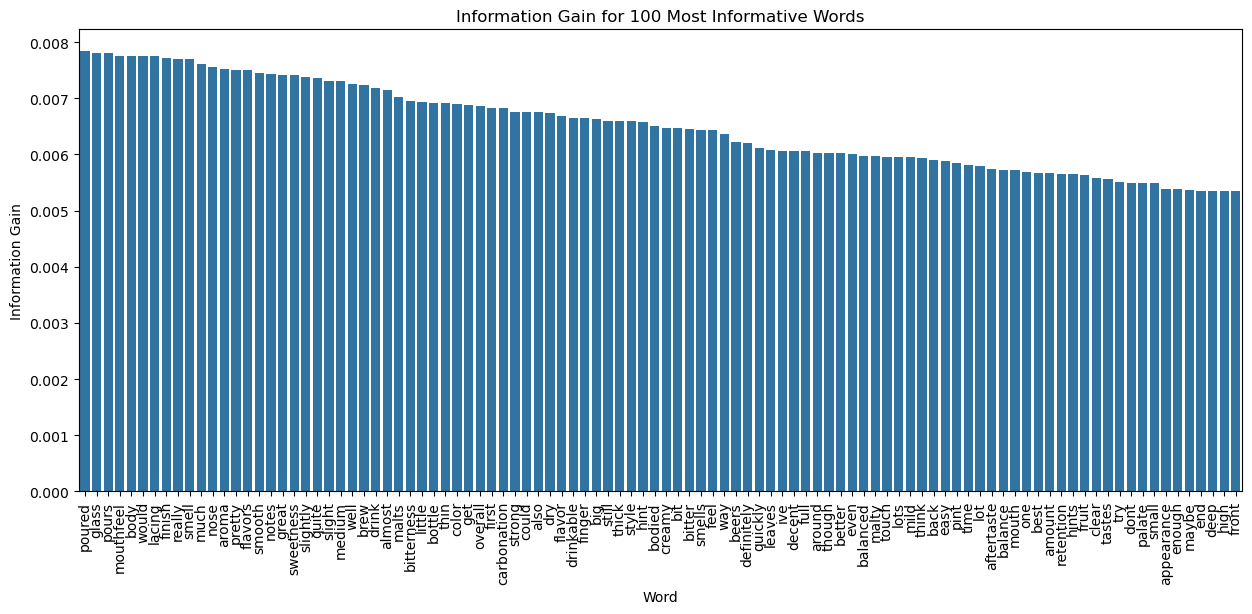

In [61]:
# plot the information gains in a bar plot in descending order (the 100 first)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x=entropy_df['word'][:100], y=entropy_df['information_gain'][:100])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Information Gain')
plt.title('Information Gain for 100 Most Informative Words')
plt.show()

# doesn't work well...

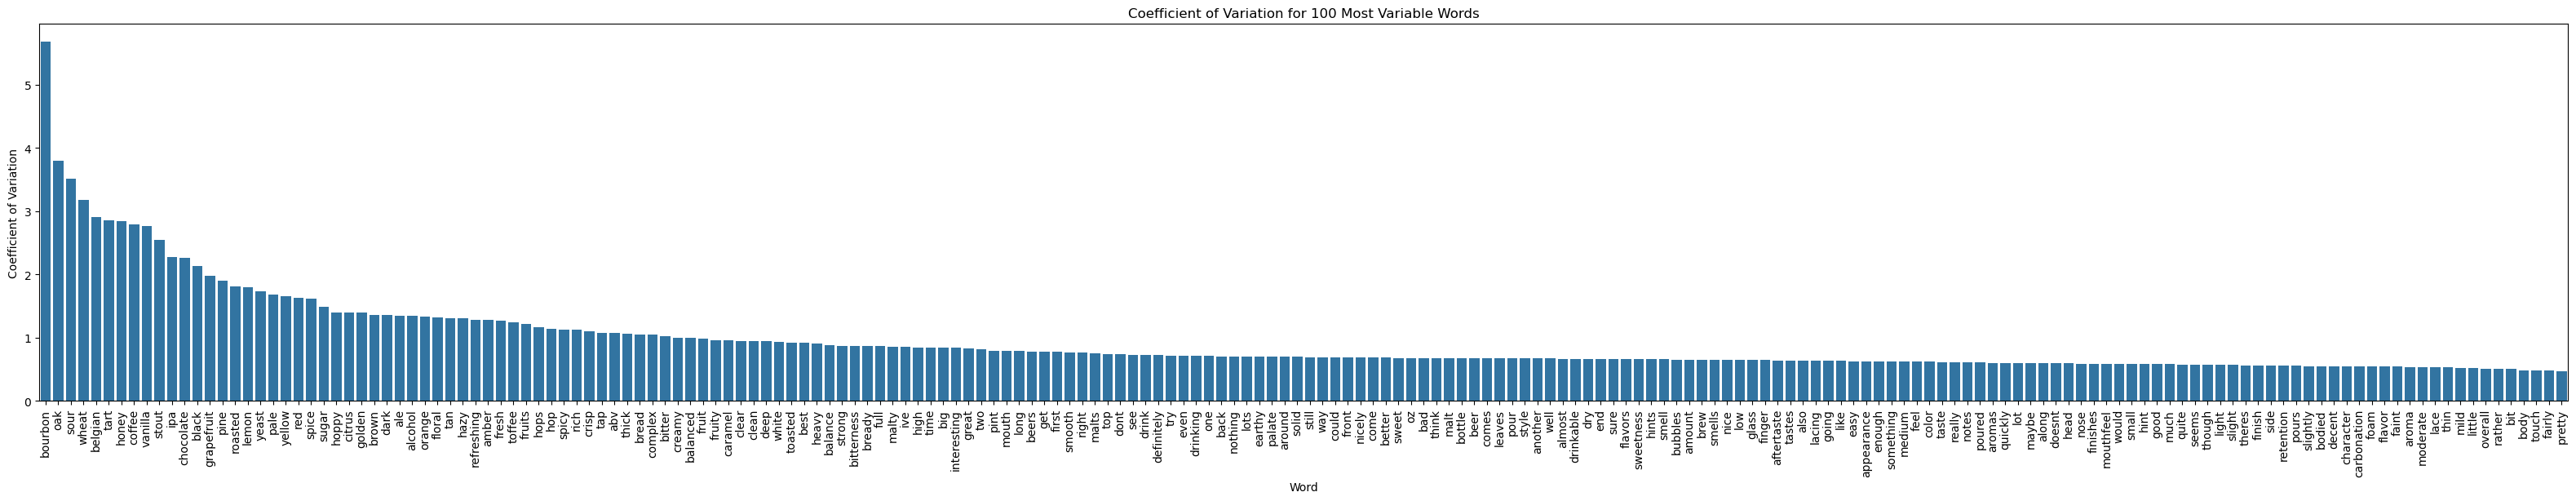

In [62]:
# let's try the variance approach

# Assume result_df is your DataFrame with 'beer_id' and word columns
# and most_common_words is the list of 1000 words

word_means = result_df_trunc[most_common_words].mean()
word_stddevs = result_df_trunc[most_common_words].std()

# Step 2: Calculate the Coefficient of Variation (CV) for each word
coeff_of_variation = word_stddevs / word_means

# plot the variances in a bar plot in descending order (the 100 first)

plt.figure(figsize=(40, 6))
sns.barplot(x=coeff_of_variation.sort_values(ascending=False)[:300].index, y=coeff_of_variation.sort_values(ascending=False)[:300])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Coefficient of Variation')
plt.title('Coefficient of Variation for 100 Most Variable Words')
plt.show()
# till "bitterness"? it seems good

In [64]:
# keep only words in coeff_of_variation until "bitterness"
coeff_of_variation = coeff_of_variation.sort_values(ascending=False)
selected_words = coeff_of_variation[:coeff_of_variation[coeff_of_variation.index=="bitterness"].index[0]]
print(selected_words)

bourbon       5.679524
oak           3.805279
sour          3.509560
wheat         3.176882
belgian       2.907012
                ...   
best          0.919717
heavy         0.901853
balance       0.876395
strong        0.870714
bitterness    0.870087
Length: 65, dtype: float64


In [65]:
# save selected_words to a json file
# import json
# with open('selected_words.json', 'w') as f:
#     json.dump(selected_words.to_dict(), f)

In [ ]:
# Now time to make the graph !

# Computing the similiraty matrix between beers

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# get the matrix of similarities between beers of result_df[selected_words]

# Load the selected words
import json
with open('selected_words.json', 'r') as f:
    selected_words = json.load(f)

# Get the selected words as a list
selected_words = list(selected_words.keys())

beer_total_ratings = result_df[["beer_id","total_ratings"]].sort_values(by="total_ratings", ascending=False)
highest_beers = beer_total_ratings.head(10000).sort_values(by="total_ratings", ascending=False)

# keep only most_rated_beers in result_df
result_df_selected = result_df[result_df["beer_id"].isin(highest_beers["beer_id"])]

# Get the selected words from the result_df
result_df_selected_filtered = result_df_selected[selected_words]

print("calculating matrix")
# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(result_df_selected_filtered)
print("matrix calculated")

# Create a DataFrame from the cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df_selected['beer_id'], columns=result_df_selected['beer_id'])

# Save the cosine similarity DataFrame
# cosine_sim_df.to_csv('cosine_similarity.csv')


calculating matrix
matrix calculated


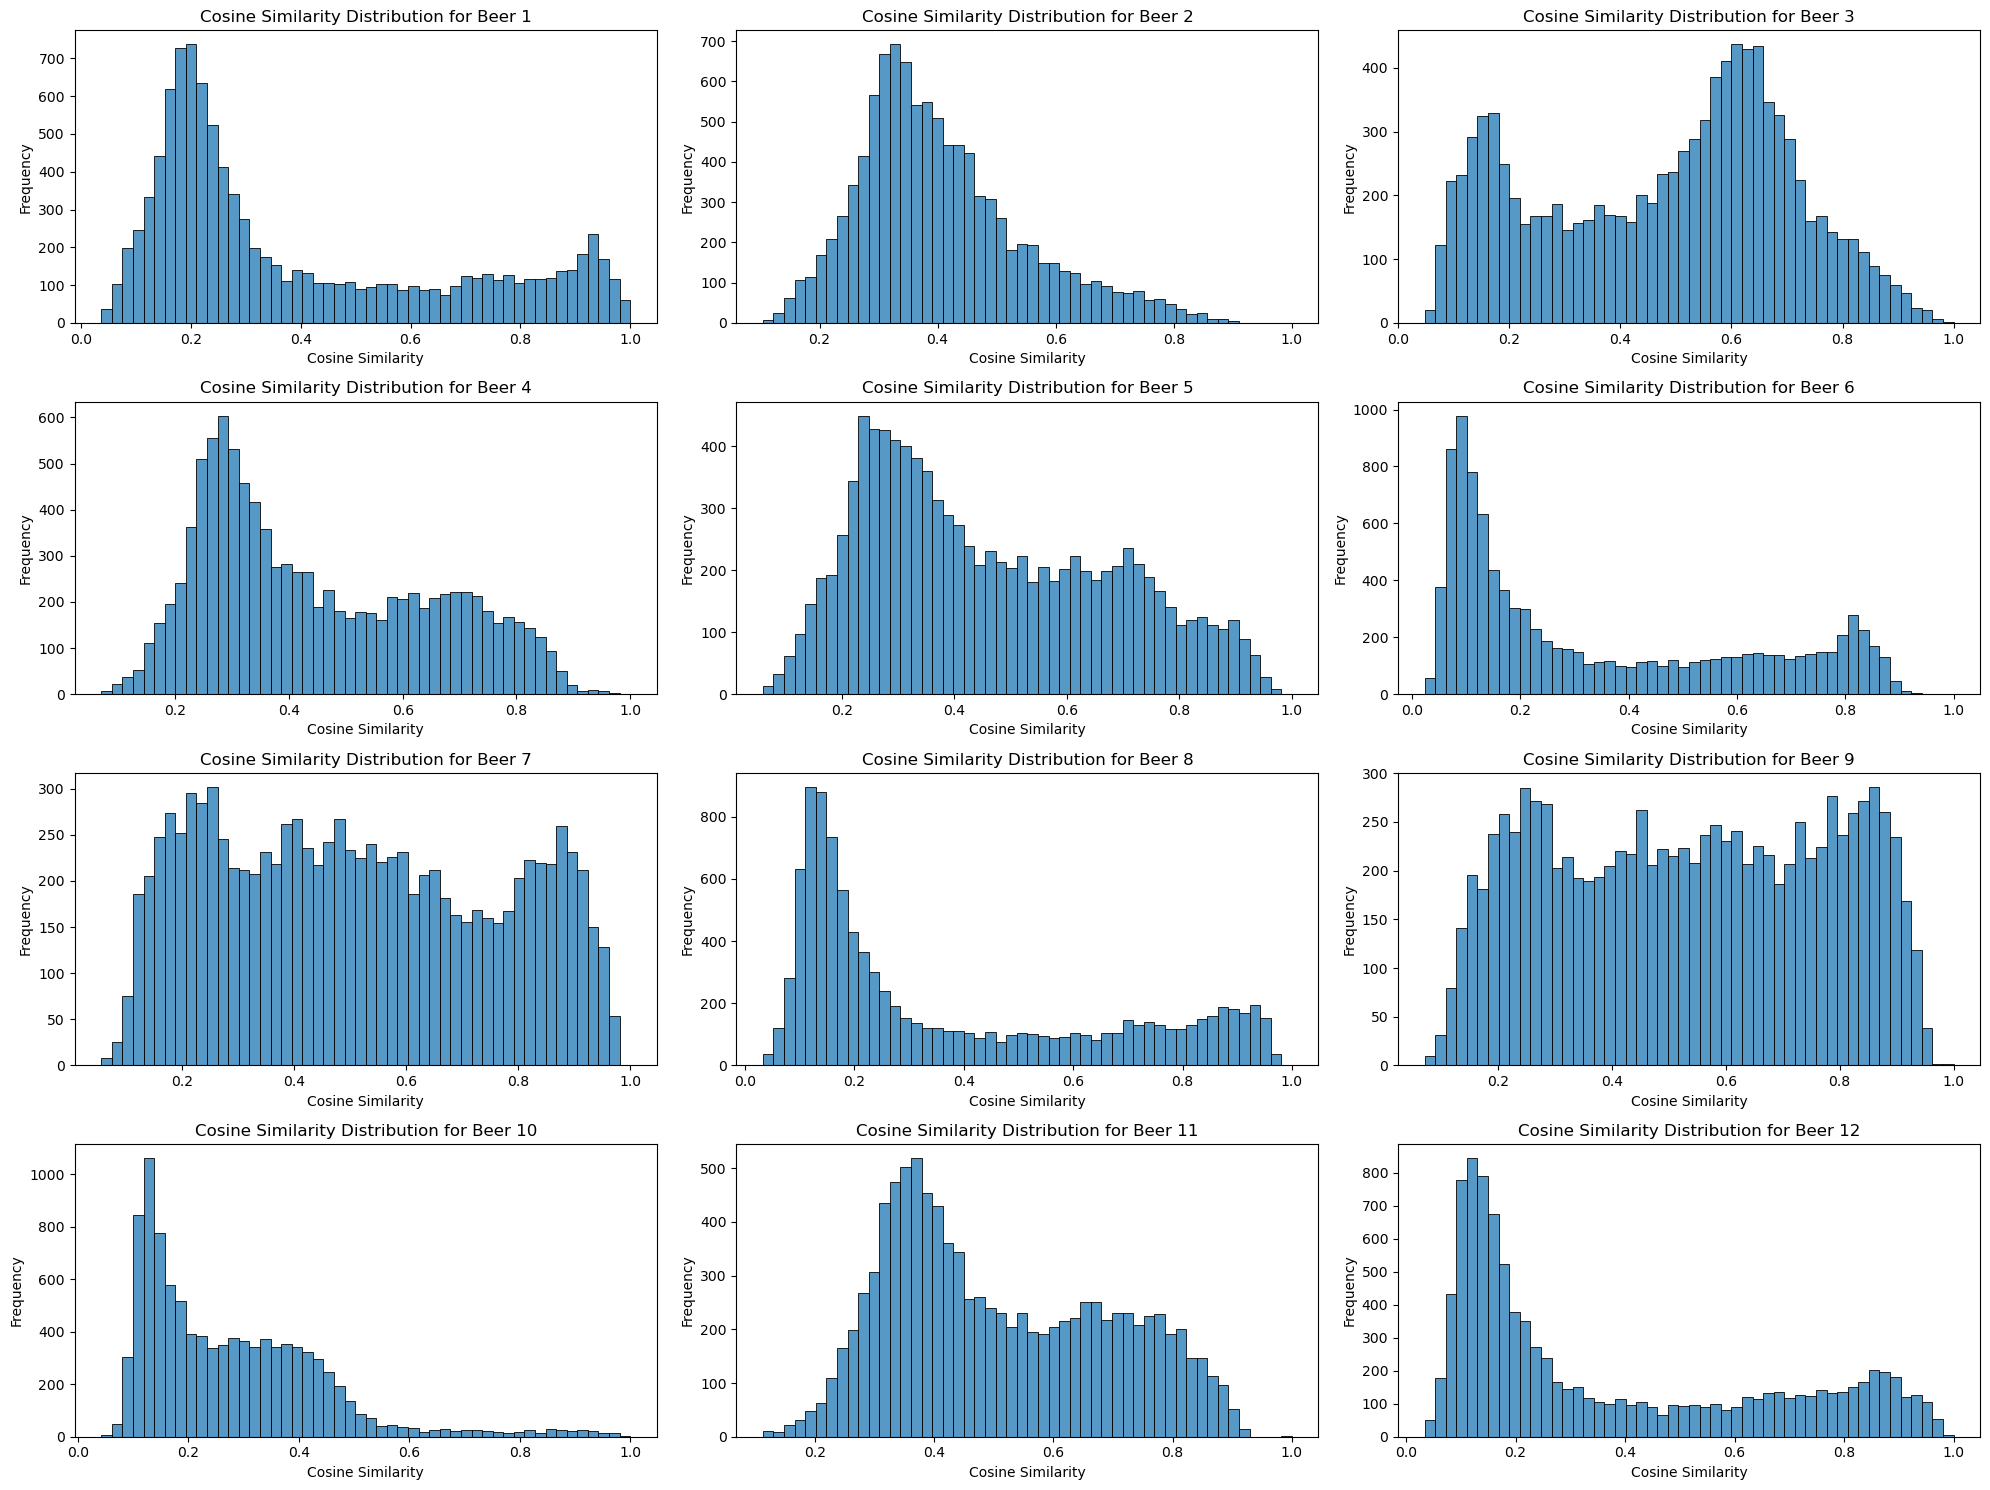

In [76]:
# plot a histogram of the cosine similarities for the 10 first beers
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

for i in range(12):
    sns.histplot(cosine_sim_df.iloc[i].values, bins=50, ax=axes[i])
    axes[i].set_title(f'Cosine Similarity Distribution for Beer {i+1}')
    axes[i].set_xlabel('Cosine Similarity')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [2]:
# consider the cosine_sim as vertex weights in a graph where the nodes are beer_ids and the edges are the cosine similarities
# then, use the Louvain algorithm to cluster the graph
import pandas as pd
import networkx as nx
import community # pip install python-louvain

# Load the cosine similarity DataFrame
cosine_sim_df = pd.read_csv('cosine_similarity.csv', index_col=0)


# Making the graph and computing clusters

On a subset of the data for testing purposes

In [1]:
import pandas as pd
import networkx as nx
import community
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix
from itertools import combinations
import gc
import os
from tqdm import tqdm

def estimate_matrix_size(filepath):
    """Estimate the size of the matrix without loading it."""
    with open(filepath, 'r') as f:
        header = f.readline().strip().split(',')
    return len(header) - 1  # Subtract 1 for index column

def count_file_lines(filepath):
    """Count lines in file efficiently."""
    with open(filepath, 'rb') as f:
        lines = sum(1 for _ in f)
    return lines - 1  # Subtract header

def get_beer_ids(filepath):
    """Get the list of beer IDs from the CSV header and index."""
    df = pd.read_csv(filepath, nrows=0)
    return list(df.columns[1:])  # Skip the first column which is the index

def stream_significant_edges(filepath, beer_ids, threshold=0.5, batch_size=10000):
    """
    Stream significant edges from the similarity matrix with progress bar.
    Uses beer_ids instead of numeric indices.
    """
    total_rows = estimate_matrix_size(filepath)
    total_chunks = (total_rows + batch_size - 1) // batch_size
    
    pbar = tqdm(total=total_rows, desc="Processing similarity matrix", 
                unit="rows", dynamic_ncols=True)
    
    # Process file in small chunks
    for chunk_start in range(0, total_rows, batch_size):
        # Define chunk end
        chunk_end = min(chunk_start + batch_size, total_rows)
        
        try:
            # Read only the necessary chunk
            chunk = pd.read_csv(
                filepath,
                skiprows=range(1, chunk_start + 1) if chunk_start > 0 else None,
                nrows=batch_size,
                index_col=0,
                dtype=np.float32
            )
            
            # Process each row in the chunk
            for i, row in enumerate(chunk.itertuples()):
                row_idx = chunk_start + i
                row_beer_id = beer_ids[row_idx]
                values = np.array(row[1:], dtype=np.float32)
                
                for col_idx in range(row_idx + 1, len(values)):
                    if values[col_idx] >= threshold:
                        col_beer_id = beer_ids[col_idx]
                        yield (row_beer_id, col_beer_id, float(values[col_idx]))
            
            # Update progress bar by chunk size
            pbar.update(len(chunk))
            
        except Exception as e:
            pbar.write(f"Error processing chunk starting at {chunk_start}: {str(e)}")
            raise
        finally:
            # Clear memory
            if 'chunk' in locals():
                del chunk
                gc.collect()
    
    pbar.close()

def build_memory_efficient_graph(filepath, threshold=0.5, batch_size=10000):
    """Build a memory-efficient graph by streaming edges with progress tracking."""
    G = nx.Graph()
    edge_count = 0
    
    # Get beer IDs first
    beer_ids = get_beer_ids(filepath)
    
    # Create a progress bar wrapper for edge processing
    edge_pbar = tqdm(desc="Building graph", total=7701533, unit=" edges", dynamic_ncols=True)
    
    for edge in stream_significant_edges(filepath, beer_ids, threshold, batch_size):
        source, target, weight = edge
        G.add_edge(source, target, weight=weight)
        edge_count += 1
        
        if edge_count % 1000 == 0:
            edge_pbar.update(1000)
            gc.collect()
    
    # Update final count
    edge_pbar.update(edge_count % 1000)
    edge_pbar.close()
    
    return G

def cluster_with_louvain(G, resolution=1.0, random_state=None):
    """Apply Louvain clustering with progress tracking."""
    print("\nPreparing graph for clustering...")
    
    # Convert to weighted edgelist with progress
    edges = list(tqdm(G.edges(data=True), 
                     desc="Converting to edgelist", 
                     total=G.number_of_edges(),
                     unit=" edges"))
    del G
    gc.collect()
    
    print("Building clustering graph...")
    G_cluster = nx.Graph()
    
    # Add edges with progress bar
    with tqdm(total=len(edges), desc="Adding edges", unit=" edges") as pbar:
        for u, v, d in edges:
            G_cluster.add_weighted_edges_from([(u, v, d['weight'])])
            pbar.update(1)
    
    del edges
    gc.collect()
    
    print("Applying Louvain clustering...")
    partition = community.best_partition(
        G_cluster, 
        resolution=resolution,
        random_state=random_state
    )
    
    return partition

filepath = 'cosine_similarity.csv'
threshold = 0.7        # Higher threshold = fewer edges = less memory
batch_size = 100000    # Smaller batch size = less memory but slower
resolution = 1.0

matrix_size = estimate_matrix_size(filepath)
print(f"\nProcessing file: {filepath}")
print(f"Estimated matrix size: {matrix_size}x{matrix_size}")

# Calculate theoretical maximum edges
max_theoretical_edges = (matrix_size * (matrix_size - 1)) // 2
print(f"Maximum possible edges: {max_theoretical_edges:,}")
print(f"Threshold: {threshold} (higher = fewer edges)")
print(f"Batch size: {batch_size} rows")

print("\nBuilding graph with significant edges...")
G = build_memory_efficient_graph(
    filepath,
    threshold=threshold,
    batch_size=batch_size
)

# Report graph statistics
print(f"\nGraph built successfully:")
print(f"- Nodes: {G.number_of_nodes():,}")
print(f"- Edges: {G.number_of_edges():,}")
print(f"- Edge density: {(2 * G.number_of_edges()) / (G.number_of_nodes() * (G.number_of_nodes() - 1)):.4%}")

print("\nApplying Louvain clustering...")
partition = cluster_with_louvain(G, resolution=resolution)

# Report clustering statistics
n_communities = len(set(partition.values()))
print(f"\nClustering completed:")
print(f"- Number of communities: {n_communities}")


Processing file: cosine_similarity.csv
Estimated matrix size: 10000x10000
Maximum possible edges: 49,995,000
Threshold: 0.7 (higher = fewer edges)
Batch size: 100000 rows

Building graph with significant edges...


Building graph: 100%|██████████| 7701533/7701533 [54:42<00:00, 2346.08 edges/s]



Graph built successfully:
- Nodes: 10,000
- Edges: 7,701,533
- Edge density: 15.4046%

Applying Louvain clustering...

Preparing graph for clustering...


Converting to edgelist: 100%|██████████| 7701533/7701533 [00:32<00:00, 239505.44 edges/s]


Building clustering graph...


Adding edges: 100%|██████████| 7701533/7701533 [00:49<00:00, 156064.44 edges/s]


Applying Louvain clustering...

Clustering completed:
- Number of communities: 5


In [2]:
import json

In [3]:
# print("\nSaving results...")
# with tqdm(total=1, desc="Saving to JSON") as pbar:
#     with open('clustering_results.json', 'w') as f:
#         json.dump(partition, f)
#     pbar.update(1)

# print("\nClustering completed successfully!")


Saving results...


Saving to JSON: 100%|██████████| 1/1 [00:00<00:00, 17.37it/s]


Clustering completed successfully!


In [4]:
# # save G
# import pickle
# with open('G.pkl', 'wb') as f:
#     pickle.dump(G, f)


In [1]:
# load G
import pickle
import networkx as nx
with open('G.pkl', 'rb') as f:
    G = pickle.load(f)

# Visualizing the clusters

In [3]:
import networkx as nx
from xml.sax.saxutils import escape
from typing import Any, Iterator
from tqdm import tqdm

def write_gexf_memory_efficient(G: nx.Graph, path: str, encoding: str = 'utf-8', prettyprint: bool = True):
    """
    Write NetworkX graph to GEXF format using memory-efficient streaming approach.
    Shows progress bars for nodes and edges writing.
    
    Parameters:
    -----------
    G : networkx.Graph
        Graph to be written
    path : str
        Path to write the GEXF file
    encoding : str, optional
        Character encoding for file (default: 'utf-8')
    prettyprint : bool, optional
        If True, adds line breaks and indentation (default: True)
    """
    def write_line(f: Any, content: str, indent: int = 0):
        """Helper to write a line with proper indentation"""
        if prettyprint:
            f.write("  " * indent + content + "\n")
        else:
            f.write(content)
            
    def stream_nodes() -> Iterator[str]:
        """Stream node XML elements one at a time with progress bar"""
        node_iterator = G.nodes(data=True)
        total_nodes = G.number_of_nodes()
        
        with tqdm(total=total_nodes, desc="Writing nodes") as pbar:
            for node_id, node_data in node_iterator:
                attrs = ' '.join([f'{k}="{escape(str(v))}"' 
                                for k, v in node_data.items()])
                pbar.update(1)
                yield f'<node id="{node_id}" label="{node_id}" {attrs}/>'
            
    def stream_edges() -> Iterator[str]:
        """Stream edge XML elements one at a time with progress bar"""
        edge_iterator = G.edges(data=True)
        total_edges = G.number_of_edges()
        
        with tqdm(total=total_edges, desc="Writing edges") as pbar:
            for u, v, edge_data in edge_iterator:
                attrs = ' '.join([f'{k}="{escape(str(v))}"' 
                                for k, v in edge_data.items()])
                pbar.update(1)
                yield f'<edge source="{u}" target="{v}" {attrs}/>'

    print(f"Starting GEXF export to {path}")
    print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    
    with open(path, 'w', encoding=encoding) as f:
        # Write header
        write_line(f, '<?xml version="1.0" encoding="UTF-8"?>')
        write_line(f, '<gexf xmlns="http://www.gexf.net/1.2draft" version="1.2">')
        write_line(f, '<graph mode="static" defaultedgetype="directed">', 1)
        
        # Write nodes section
        write_line(f, '<nodes>', 2)
        for node in stream_nodes():
            write_line(f, node, 3)
        write_line(f, '</nodes>', 2)
        
        # Write edges section
        write_line(f, '<edges>', 2)
        for edge in stream_edges():
            write_line(f, edge, 3)
        write_line(f, '</edges>', 2)
        
        # Write footer
        write_line(f, '</graph>', 1)
        write_line(f, '</gexf>')
    
    print("GEXF export completed successfully")

write_gexf_memory_efficient(G, 'G.gexf')

Starting GEXF export to G.gexf
Graph has 10000 nodes and 7701533 edges


Writing edges: 100%|██████████| 7701533/7701533 [00:50<00:00, 153427.86it/s]


GEXF export completed successfully


In [1]:
# load G
import pickle
import networkx as nx
with open('G.pkl', 'rb') as f:
    G = pickle.load(f)

In [34]:
# print first line of the file beer_word_counts2.csv
with open('beer_word_counts2.csv', 'r') as f:
    print(f.readline())
    

beer_id,beer,head,nice,light,good,malt,taste,like,hops,sweet,one,bit,dark,carbonation,flavor,little,aroma,well,color,hop,bottle,body,finish,medium,really,white,pours,chocolate,caramel,brown,much,notes,glass,citrus,bitterness,lacing,poured,smell,great,alcohol,malts,bitter,would,nose,smooth,flavors,coffee,mouthfeel,sweetness,pretty,slightly,orange,quite,dry,fruit,thin,roasted,style,creamy,slight,black,brew,ale,overall,thick,big,drink,almost,clear,amber,ipa,strong,get,finger,bodied,hint,malty,also,first,still,golden,mild,decent,yeast,pine,pale,feel,could,beers,touch,drinkable,smells,floral,full,grapefruit,balanced,way,fruity,lots,crisp,tan,better,vanilla,stout,hoppy,definitely,though,quickly,even,balance,pint,moderate,hazy,around,easy,leaves,deep,retention,character,hints,palate,back,rich,think,ive,earthy,amount,lot,small,best,solid,aftertaste,bad,clean,spicy,wheat,abv,time,fairly,tastes,lemon,fresh,try,enough,mouth,lace,nothing,front,dont,spice,sour,end,pour,high,maybe,appearance,yellow,

In [37]:
# load result_df total_ratings
result_df = pd.read_csv('beer_word_counts2.csv', usecols=['beer_id', 'total_ratings'])

In [41]:
# Load the ratings file with the necessary columns
df_ratings = pd.read_csv('../BeerAdvocate/ratings_processed_cleaned.csv', usecols=['beer_id', 'beer_name'])

# Create a dictionary for fast lookup of beer names
beer_name_dict = df_ratings.set_index("beer_id")["beer_name"].to_dict()

# Use map to apply this dictionary to result_df's beer_id column
result_df["beer_name"] = result_df["beer_id"].map(beer_name_dict)


In [42]:
beer_total_ratings = result_df[['beer_id','beer_name', 'total_ratings']].sort_values(by="total_ratings", ascending=False)
highest_beers = beer_total_ratings.head(10000).sort_values(by="total_ratings", ascending=False)

# keep only most_rated_beers in result_df
result_df_selected = result_df[result_df["beer_id"].isin(highest_beers["beer_id"])]

In [43]:
print(beer_total_ratings)

        beer_id                            beer_name  total_ratings
4960       2093                        90 Minute IPA           3899
6300      11757             Founders Breakfast Stout           3811
469         412  Old Rasputin Russian Imperial Stout           3722
565        7971                      Pliny The Elder           3690
6280       1093                      Two Hearted Ale           3561
...         ...                                  ...            ...
131496   183420                     Belgium Pale Ale              0
113731   136884                  Red Oak Aged Bender              0
121267   179691           San Miguel 0.0% Melocotuva              0
121268   194320               San Miguel Gluten Free              0
137832   129764                  Wild Wallonian Dawn              0

[137833 rows x 3 columns]


In [10]:
# I have : 
# G (networkx graph, nodes are beer_ids, edges are cosine similarities), 
# result_df_selected (dataframe, columns : beer_id, total_ratings)
# partition (dict beer_id -> community)
# make a beautiful graph representation with the community colors, the size of the nodes proportional to the total_ratings, and the labels the beer_ids

{'28248': 0, '47232': 1, '62817': 0, '52414': 0, '37300': 1, '50235': 0, '84732': 0, '39334': 0, '2464': 1, '2442': 0, '88726': 0, '65076': 0, '15884': 0, '12873': 0, '989': 1, '35930': 0, '40775': 0, '119725': 0, '2812': 0, '151731': 0, '105906': 0, '72490': 0, '2810': 0, '73': 0, '75507': 0, '76400': 1, '50771': 0, '24230': 0, '28616': 0, '3314': 0, '96': 0, '48474': 0, '3375': 0, '40936': 0, '56054': 0, '35201': 0, '32763': 0, '63379': 0, '122762': 0, '73949': 0, '66786': 0, '56890': 0, '123180': 0, '210198': 0, '207534': 0, '63164': 0, '87109': 0, '62984': 0, '167494': 0, '185158': 0, '66063': 0, '21950': 0, '71870': 1, '75010': 0, '75564': 0, '48616': 0, '6': 0, '1186': 1, '63124': 0, '77595': 0, '221': 0, '47631': 0, '408': 0, '412': 0, '50752': 0, '87756': 0, '144603': 0, '183596': 0, '70129': 0, '68805': 0, '20445': 0, '926': 1, '150933': 0, '1373': 0, '112938': 0, '56554': 0, '63779': 0, '65241': 0, '12172': 0, '54635': 0, '63804': 0, '76377': 0, '76100': 0, '63511': 0, '55065

In [1]:
import pickle
import pandas as pd
import networkx as nx
with open('G.pkl', 'rb') as f:
    G = pickle.load(f)

# Load the ratings file with the necessary columns
df_ratings = pd.read_csv('../BeerAdvocate/ratings_processed_cleaned.csv', usecols=['beer_id', 'beer_name'])

# Create a dictionary for fast lookup of beer names
beer_name_dict = df_ratings.set_index("beer_id")["beer_name"].to_dict()

In [2]:
# save beer_name_dict to pickle
import pickle
with open('beer_name_dict.pkl', 'wb') as f:
    pickle.dump(beer_name_dict, f)
    

In [2]:
result_df = pd.read_csv('beer_word_counts2.csv')

# Use map to apply this dictionary to result_df's beer_id column
result_df["beer_name"] = result_df["beer_id"].map(beer_name_dict)

beer_total_ratings = result_df[['beer_id','beer_name', 'total_ratings']].sort_values(by="total_ratings", ascending=False)
highest_beers = beer_total_ratings.head(10000).sort_values(by="total_ratings", ascending=False)

# keep only most_rated_beers in result_df
result_df_selected = result_df[result_df["beer_id"].isin(highest_beers["beer_id"])]

# load partition clustering_results.json
import json
with open('clustering_results.json', 'r') as f:
    partition = json.load(f)

In [ ]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
from tqdm import tqdm
import random

def get_gradient_color(color1, color2, ratio):
    """Create a color gradient between two colors"""
    def hex_to_rgb(hex_color):
        hex_color = hex_color.lstrip('#')
        return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    rgb_gradient = tuple(int(rgb1[i] + (rgb2[i] - rgb1[i]) * ratio) for i in range(3))
    return f'rgb{rgb_gradient}'

def simplified_layout(G, partition):
    """
    Simpler layout function that combines spring layout with community awareness
    """
    # Use spring layout as the base
    pos = nx.spring_layout(G, k=1.5/np.sqrt(len(G.nodes())), iterations=50)
    
    # Slightly adjust positions based on communities
    community_centers = {}
    for node, comm in partition.items():
        if comm not in community_centers:
            community_centers[comm] = np.zeros(2)
        community_centers[comm] += pos[node]
    
    for comm in community_centers:
        nodes_in_comm = sum(1 for n in partition if partition[n] == comm)
        community_centers[comm] /= nodes_in_comm
    
    # Apply a gentle pull toward community centers
    for node in G.nodes():
        comm = partition[node]
        pos[node] = 0.8 * pos[node] + 0.2 * community_centers[comm]
    
    return pos

def visualize_beer_network(G, result_df_selected, partition, ratio=1.0):
    """
    Visualize beer network with community colors and node sizes based on ratings.
    Using a standard dark theme and simplified layout.
    """
    print(f"Original graph size: {len(G.nodes())} nodes")
    
    # Convert beer_id to the same type as graph nodes
    result_df_selected.loc[:, 'beer_id'] = result_df_selected['beer_id'].astype(type(list(G.nodes())[0]))
    
    if ratio < 1.0:
        sampled_nodes = random.sample(list(G.nodes()), int(len(G.nodes()) * ratio))
        G = G.subgraph(sampled_nodes)
        partition = {k: v for k, v in partition.items() if k in sampled_nodes}
        print(f"Sampled graph size: {len(G.nodes())} nodes")
    
    n_communities = len(set(partition.values()))
    palette = sns.color_palette("husl", n_communities).as_hex()
    community_colors = {comm: color for comm, color in 
                       zip(sorted(set(partition.values())), palette)}
    
    print("Calculating layout...")
    pos = simplified_layout(G, partition)
    
    print("Processing edges...")
    edge_traces = []
    
    for edge in tqdm(G.edges(), desc="Processing edges"):
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        
        color1 = community_colors[partition[edge[0]]]
        color2 = community_colors[partition[edge[1]]]
        edge_color = get_gradient_color(color1, color2, 0.5)
        
        edge_trace = go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            line=dict(width=0.5, color=edge_color),
            hoverinfo='none',
            mode='lines',
            opacity=0.3,
            showlegend=False
        )
        edge_traces.append(edge_trace)
    
    # Get ratings and names for all nodes
    print("Calculating ratings range...")
    node_ratings = {}
    node_names = {}
    default_rating = 27
    
    for node in G.nodes():
        matching_rows = result_df_selected[result_df_selected['beer_id'] == node]
        if not matching_rows.empty:
            node_ratings[node] = matching_rows['total_ratings'].iloc[0]
            node_names[node] = matching_rows['beer_name'].iloc[0]
        else:
            node_ratings[node] = default_rating
            node_names[node] = f"Beer {node}"
            print(f"Warning: No data found for node {node}, using default values")
    
    min_ratings = min(node_ratings.values())
    max_ratings = max(node_ratings.values())
    
    node_traces = {}
    for community in set(partition.values()):
        node_traces[community] = go.Scatter(
            x=[],
            y=[],
            text=[],
            mode='markers',
            hoverinfo='text',
            marker=dict(
                color=community_colors[community],
                size=[],
                line=dict(width=1, color='#444')
            ),
            name=f'Community {community}'
        )
    
    print("Processing nodes...")
    for node in tqdm(G.nodes(), desc="Processing nodes"):
        x, y = pos[node]
        community = partition[node]
        total_ratings = node_ratings[node]
        beer_name = node_names[node]
        
        normalized_ratings = (total_ratings - min_ratings) / (max_ratings - min_ratings)
        node_size = 3 + 15 * (np.exp(normalized_ratings * 2) - 1)
        
        node_traces[community]['x'] += tuple([x])
        node_traces[community]['y'] += tuple([y])
        node_traces[community]['marker']['size'] += tuple([node_size])
        node_traces[community]['text'] += tuple([
            f'Beer: {beer_name}<br>'
            f'ID: {node}<br>'
            f'Ratings: {total_ratings:,}'
        ])
    
    print("Creating figure...")
    fig = go.Figure(
        data=edge_traces + list(node_traces.values()),
        layout=go.Layout(
            title=dict(
                text=f'Beer Network Communities (showing {ratio*100:.1f}% of nodes)',
                font=dict(color='#FFFFFF')
            ),
            showlegend=True,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            paper_bgcolor='#1E1E1E',  # Standard dark theme background
            plot_bgcolor='#1E1E1E',
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
        )
    )
    
    fig.update_layout(
        legend=dict(
            x=1.05,
            y=0.5,
            title_text='Communities',
            font=dict(color='#FFFFFF'),
            bordercolor='#444',
            borderwidth=1,
            bgcolor='rgba(30,30,30,0.8)'
        ),
        width=1000,
        height=800
    )
    
    print("Visualization ready!")
    return fig



# load G
# nx.write_gpickle(G_cluster, output_file)
G = nx.read_gpickle('outputs/graph.pkl') # node labels are beer_ids

# load beer_name_dict
import pickle
with open('beer_name_dict.pkl', 'rb') as f:
    beer_name_dict = pickle.load(f)

result_df = pd.read_csv('beer_word_counts2.csv', usecols=['beer_id', 'total_ratings'])

# Use map to apply this dictionary to result_df's beer_id column
result_df["beer_name"] = result_df["beer_id"].map(beer_name_dict)

# Load the partition
import json
with open('outputs/partition.json', 'r') as f:
    partition = json.load(f)

fig = visualize_beer_network(G, result_df, partition, ratio=1.0)
fig.write_html('outputs/beer_network.html')

# save the figure to a pickle
import pickle
with open('outputs/graph_fig.pkl', 'wb') as f:
    pickle.dump(fig, f)

# fig.show()

In [45]:
fig.write_html('beer_network.html')
